En el apartado "Loading Data" de esta URL:

https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python

Se explica cómo se cargan una serie de datos: 

1. Utiliza esa misma forma para cargar los datos.
2. Limpia los datos si es necesario
3. Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados? 
4. Intenta superarte en el score cambiando las features de los algoritmos.

In [1]:
# Imports 

import random
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import seaborn as sns

import math
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR, LinearSVC


import warnings
warnings.filterwarnings('ignore')

### 1) Utiliza esa misma forma para cargar los datos.

In [2]:
#Import scikit-learn dataset library
from sklearn import datasets

#Load dataset
cancer = datasets.load_breast_cancer()

### 2) Limpia los datos si es necesario

In [3]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [4]:
cancer.data.shape

(569, 30)

In [5]:
cancer.data[:5]

array([[1.799e+01, 1.038e+01, 1.228e+02, 1.001e+03, 1.184e-01, 2.776e-01,
        3.001e-01, 1.471e-01, 2.419e-01, 7.871e-02, 1.095e+00, 9.053e-01,
        8.589e+00, 1.534e+02, 6.399e-03, 4.904e-02, 5.373e-02, 1.587e-02,
        3.003e-02, 6.193e-03, 2.538e+01, 1.733e+01, 1.846e+02, 2.019e+03,
        1.622e-01, 6.656e-01, 7.119e-01, 2.654e-01, 4.601e-01, 1.189e-01],
       [2.057e+01, 1.777e+01, 1.329e+02, 1.326e+03, 8.474e-02, 7.864e-02,
        8.690e-02, 7.017e-02, 1.812e-01, 5.667e-02, 5.435e-01, 7.339e-01,
        3.398e+00, 7.408e+01, 5.225e-03, 1.308e-02, 1.860e-02, 1.340e-02,
        1.389e-02, 3.532e-03, 2.499e+01, 2.341e+01, 1.588e+02, 1.956e+03,
        1.238e-01, 1.866e-01, 2.416e-01, 1.860e-01, 2.750e-01, 8.902e-02],
       [1.969e+01, 2.125e+01, 1.300e+02, 1.203e+03, 1.096e-01, 1.599e-01,
        1.974e-01, 1.279e-01, 2.069e-01, 5.999e-02, 7.456e-01, 7.869e-01,
        4.585e+00, 9.403e+01, 6.150e-03, 4.006e-02, 3.832e-02, 2.058e-02,
        2.250e-02, 4.571e-03, 2.357e

In [6]:
cancer.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [7]:
cancer.keys()

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [8]:
cancer["feature_names"]

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

La información parece relevante en general, así que voy a tirar palante

### Utiliza los métodos de clasificación vistos hasta ahora para clasificar el target de los datos, ¿cuál da mejores resultados?

In [9]:
# Let's split the data

x_train, x_test, y_train, y_test = train_test_split(cancer.data, cancer.target, test_size = 0.2, random_state = 0)

# Set the some parameters for all the models
seed = 1
iterations = 300

In [10]:
# First model: Logistic regression

# Model instance
logRegresion = linear_model.LogisticRegression(max_iter = iterations, random_state = seed, n_jobs = -1)

# Model training
logRegresion.fit(x_train, y_train)

# Model score
train_score = logRegresion.score(x_train, y_train)
test_score = logRegresion.score(x_test, y_test)

print(f"training score: {train_score}\ntest score: {test_score}")

training score: 0.9560439560439561
test score: 0.956140350877193


Not bad

In [11]:
# Second model: K nearest neighbor

ks = range(1, 11)

for k in ks:
    # Model instance
    knn = KNeighborsClassifier(n_neighbors = k, n_jobs = -1)

    # Model training
    knn.fit(x_train, y_train)

    # Scores
    train_score = knn.score(x_train, y_train)
    test_score = knn.score(x_test, y_test)

    print(f"Model with k = {k}")
    print(f"training score: {train_score}\ntest score: {test_score}")
    print("-" * 50)

Model with k = 1
training score: 1.0
test score: 0.9122807017543859
--------------------------------------------------
Model with k = 2
training score: 0.9626373626373627
test score: 0.8947368421052632
--------------------------------------------------
Model with k = 3
training score: 0.9604395604395605
test score: 0.9122807017543859
--------------------------------------------------
Model with k = 4
training score: 0.9516483516483516
test score: 0.9210526315789473
--------------------------------------------------
Model with k = 5
training score: 0.9494505494505494
test score: 0.9385964912280702
--------------------------------------------------
Model with k = 6
training score: 0.9384615384615385
test score: 0.9385964912280702
--------------------------------------------------
Model with k = 7
training score: 0.9340659340659341
test score: 0.9473684210526315
--------------------------------------------------
Model with k = 8
training score: 0.9384615384615385
test score: 0.94736842105

Parece que este modelo para 9 neighbors lo hace mejor con el test data que el logistic Regression

In [12]:
# Third model: Linear SVC

# Model instance
svc = LinearSVC(C = 100, random_state = seed, max_iter = iterations)

# Model training
svc.fit(x_train, y_train)

# Model score
train_score = svc.score(x_train, y_train)
test_score = svc.score(x_test, y_test)

print(f"training score: {train_score}\ntest score: {test_score}")

training score: 0.9274725274725275
test score: 0.9385964912280702


Bueno, parece que bajo condiciones similares, el modelo de regresión logística es el que mejor lo hace para el test data. Es decir, es el que mejor identifica patrones generalizables a nuevos datos.

### Intenta superarte en el score cambiando las features de los algoritmos.

In [19]:
# Let's start with the LogisticRegresion one

# 1)
log_iterations = range(100, 400, 100)
solvers = ["newton-cg", "lbfgs", "liblinear", "sag", "saga"]

scores = {}

for solver in solvers:
    subscore = {}

    for iteration in log_iterations:
        # Model instance
        model_log = linear_model.LogisticRegression(max_iter = iteration, random_state = seed, solver = solver, n_jobs = -1)

        # Model training
        model_log.fit(x_train, y_train)

        # Model score
        log_train_score = model_log.score(x_train, y_train)
        log_test_score = model_log.score(x_test, y_test)
        
        subscore[iteration] = {"train_score" : log_train_score, "test_score" : log_test_score}

        print(f"Model with iterations = {iteration} and seed = {seed}")
        print(f"training score: {log_train_score}\ntest score: {log_test_score}")
        print("-" * 50)

    scores[solver] = subscore

Model with iterations = 100 and seed = 1
training score: 0.9626373626373627
test score: 0.9473684210526315
--------------------------------------------------
Model with iterations = 200 and seed = 1
training score: 0.9626373626373627
test score: 0.9473684210526315
--------------------------------------------------
Model with iterations = 300 and seed = 1
training score: 0.9626373626373627
test score: 0.9473684210526315
--------------------------------------------------
Model with iterations = 100 and seed = 1
training score: 0.9560439560439561
test score: 0.9473684210526315
--------------------------------------------------
Model with iterations = 200 and seed = 1
training score: 0.9560439560439561
test score: 0.956140350877193
--------------------------------------------------
Model with iterations = 300 and seed = 1
training score: 0.9560439560439561
test score: 0.956140350877193
--------------------------------------------------
Model with iterations = 100 and seed = 1
training scor

In [44]:
# Let's do some data transformation to plot this
scores_df = pd.DataFrame(scores).unstack()
scores_df = scores_df.reset_index()
scores_df.columns = ["solver", "iterations", "scores"]
scores_df["train_score"] = scores_df["scores"].apply(lambda x: x["train_score"])
scores_df["test_score"] = scores_df["scores"].apply(lambda x: x["test_score"])
scores_df[scores_df["iterations"] == 100]

,solver,iterations,scores,train_score,test_score
0,newton-cg,100,"{'train_score': 0.9626373626373627, 'test_scor...",0.962637,0.947368
3,lbfgs,100,"{'train_score': 0.9560439560439561, 'test_scor...",0.956044,0.947368
6,liblinear,100,"{'train_score': 0.9582417582417583, 'test_scor...",0.958242,0.956140
9,sag,100,"{'train_score': 0.9164835164835164, 'test_scor...",0.916484,0.903509
12,saga,100,"{'train_score': 0.9142857142857143, 'test_scor...",0.914286,0.885965


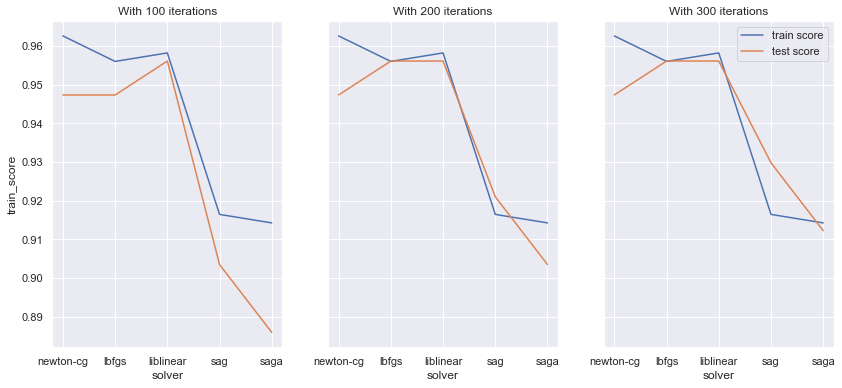

In [60]:
sns.set_theme()

fig, axes = plt.subplots(1, 3, figsize = (14, 6), sharey = True)

for index, iteration in enumerate(log_iterations):
    to_plot = scores_df[scores_df["iterations"] == iteration]

    sns.lineplot(x = to_plot["solver"], y = to_plot["train_score"], ax = axes[index])
    sns.lineplot(x = to_plot["solver"], y = to_plot["test_score"], ax = axes[index])

    plt.legend(["train score", "test score"])
    axes[index].set_title(f"With {iteration} iterations")

In [67]:
scores_df[scores_df["test_score"] == scores_df["test_score"].max()]

,solver,iterations,scores,train_score,test_score
4,lbfgs,200,"{'train_score': 0.9560439560439561, 'test_scor...",0.956044,0.95614
5,lbfgs,300,"{'train_score': 0.9560439560439561, 'test_scor...",0.956044,0.95614
6,liblinear,100,"{'train_score': 0.9582417582417583, 'test_scor...",0.958242,0.95614
7,liblinear,200,"{'train_score': 0.9582417582417583, 'test_scor...",0.958242,0.95614
8,liblinear,300,"{'train_score': 0.9582417582417583, 'test_scor...",0.958242,0.95614


Parece que los mejores resultados para el test set (que es el que nos interesa predecir) los obtenemos con los solvers lbfgs y liblinear.

In [122]:
# 2) K nearest neighbor

# Parameters
neighbors = range(1, 11)
weights = ["uniform", "distance"]
algorithms = ["auto", "ball_tree", "kd_tree", "brute"]

scores_knn = {}

for weight in weights:
    subscore_1 = {}

    for algorithm in algorithms:
        subscore_2 = {}

        for k in ks:
            # Model instance
            model_knn = KNeighborsClassifier(n_neighbors = k, weights = weight, algorithm = algorithm, n_jobs = -1)

            # Model training
            model_knn.fit(x_train, y_train)

            # Scores
            knn_train_score = model_knn.score(x_train, y_train)
            knn_test_score = model_knn.score(x_test, y_test)

            #print(f"Model with weight = {weight}, algorithm = {algorithm}, k = {k}")
            #print(f"training score: {knn_train_score}\ntest score: {knn_test_score}")
            #print("-" * 50)

            subscore_2[k] = {"train_score" : knn_train_score, "test_score" : knn_test_score}
            subscore_1[algorithm] = subscore_2
            scores_knn[weight] = subscore_1

In [123]:
# Data transformation for later plot
uniform_df = pd.DataFrame(scores_knn["uniform"]).unstack().reset_index()
uniform_df.columns = ["algorithm", "neighbors", "scores"]
uniform_df["train_score"] = uniform_df["scores"].apply(lambda x: x["train_score"])
uniform_df["test_score"] = uniform_df["scores"].apply(lambda x: x["test_score"])
uniform_df["weights"] = "uniform"

distance_df = pd.DataFrame(scores_knn["distance"]).unstack().reset_index()
distance_df.columns = ["algorithm", "neighbors", "scores"]
distance_df["train_score"] = distance_df["scores"].apply(lambda x: x["train_score"])
distance_df["test_score"] = distance_df["scores"].apply(lambda x: x["test_score"])
distance_df["weights"] = "distance"

scores_knn_df = pd.concat([uniform_df, distance_df], axis = 0)
scores_knn_df

,algorithm,neighbors,scores,train_score,test_score,weights
0,auto,1,"{'train_score': 1.0, 'test_score': 0.912280701...",1.000000,0.912281,uniform
1,auto,2,"{'train_score': 0.9626373626373627, 'test_scor...",0.962637,0.894737,uniform
2,auto,3,"{'train_score': 0.9604395604395605, 'test_scor...",0.960440,0.912281,uniform
3,auto,4,"{'train_score': 0.9516483516483516, 'test_scor...",0.951648,0.921053,uniform
4,auto,5,"{'train_score': 0.9494505494505494, 'test_scor...",0.949451,0.938596,uniform
...,...,...,...,...,...,...
35,brute,6,"{'train_score': 1.0, 'test_score': 0.938596491...",1.000000,0.938596,distance
36,brute,7,"{'train_score': 1.0, 'test_score': 0.938596491...",1.000000,0.938596,distance
37,brute,8,"{'train_score': 1.0, 'test_score': 0.947368421...",1.000000,0.947368,distance
38,brute,9,"{'train_score': 1.0, 'test_score': 0.947368421...",1.000000,0.947368,distance


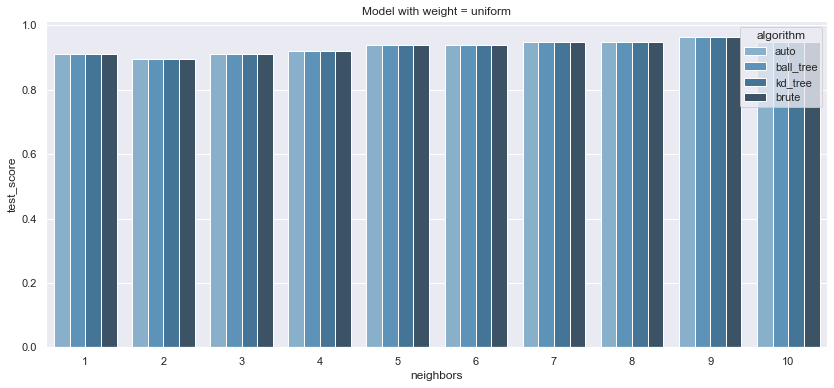

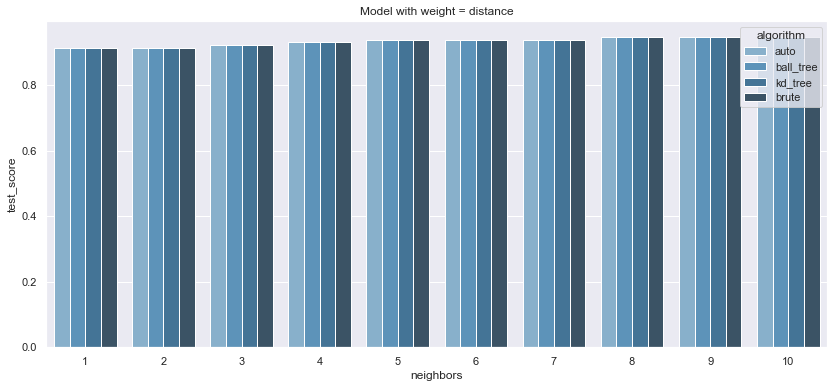

In [124]:
# Plot of test score
for weight in weights:
    to_plot = scores_knn_df[scores_knn_df["weights"] == weight]

    plt.figure(figsize = (14, 6))
    sns.barplot(data = to_plot, x = "neighbors", y = "test_score", hue = "algorithm", ci = None, palette = "Blues_d")
    plt.title(f"Model with weight = {weight}")
    plt.show()

In [125]:
scores_knn_df[scores_knn_df["test_score"] == scores_knn_df["test_score"].max()]

,algorithm,neighbors,scores,train_score,test_score,weights
8,auto,9,"{'train_score': 0.9362637362637363, 'test_scor...",0.936264,0.964912,uniform
18,ball_tree,9,"{'train_score': 0.9362637362637363, 'test_scor...",0.936264,0.964912,uniform
28,kd_tree,9,"{'train_score': 0.9362637362637363, 'test_scor...",0.936264,0.964912,uniform
38,brute,9,"{'train_score': 0.9362637362637363, 'test_scor...",0.936264,0.964912,uniform


Para este modelo, vemos que utilizar weight = uniform es claramente mejor, y a mayor número de vecinos, mayor precisión en las predicciones.

In [137]:
# 3) Linear SVC

# Parameters
loss = ["hinge", "squared_hinge"]
Cs = range(0, 100, 10)
svc_iterations = range(100, 1000, 100)

scores_svc = {}

for loss_ in loss:
    subscore_1 = {}

    for C in Cs:
        subscore_2 = {}

        for iteration in svc_iterations:
            try:
                # Model instance
                model_svc = LinearSVC(loss = loss_, C = C, random_state = seed, max_iter = iteration)

                # Model training
                model_svc.fit(x_train, y_train)

                # Model score
                svc_train_score = model_svc.score(x_train, y_train)
                svc_test_score = model_svc.score(x_test, y_test)

                #print(f"Model with penalty = {penalty}, loss = {loss_}, C = {C}")
                #print(f"training score: {svc_train_score}\ntest score: {svc_test_score}")
                #print("-" * 50)

                subscore_2[iteration] = {"train_score" : svc_train_score, "test_score" : svc_test_score}
                subscore_1[C] = subscore_2
                scores_svc[loss_] = subscore_1
            except:
                pass

In [153]:
# Data transformation for later plot
hinge_df = pd.DataFrame(scores_svc["hinge"]).unstack().reset_index()
hinge_df.columns = ["C", "iterations", "scores"]
hinge_df["train_score"] = hinge_df["scores"].apply(lambda x: x["train_score"])
hinge_df["test_score"] = hinge_df["scores"].apply(lambda x: x["test_score"])
hinge_df["loss"] = "hinge"

squared_hinge_df = pd.DataFrame(scores_svc["squared_hinge"]).unstack().reset_index()
squared_hinge_df.columns = ["C", "iterations", "scores"]
squared_hinge_df["train_score"] = squared_hinge_df["scores"].apply(lambda x: x["train_score"])
squared_hinge_df["test_score"] = squared_hinge_df["scores"].apply(lambda x: x["test_score"])
squared_hinge_df["loss"] = "squared_hinge"

scores_svc_df = pd.concat([hinge_df, squared_hinge_df], axis = 0)
scores_svc_df

,C,iterations,scores,train_score,test_score,loss
0,10,100,"{'train_score': 0.8549450549450549, 'test_scor...",0.854945,0.833333,hinge
1,10,200,"{'train_score': 0.8593406593406593, 'test_scor...",0.859341,0.833333,hinge
2,10,300,"{'train_score': 0.9274725274725275, 'test_scor...",0.927473,0.938596,hinge
3,10,400,"{'train_score': 0.9120879120879121, 'test_scor...",0.912088,0.921053,hinge
4,10,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.929670,0.947368,hinge
...,...,...,...,...,...,...
76,90,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.929670,0.947368,squared_hinge
77,90,600,"{'train_score': 0.8813186813186813, 'test_scor...",0.881319,0.833333,squared_hinge
78,90,700,"{'train_score': 0.9252747252747253, 'test_scor...",0.925275,0.938596,squared_hinge
79,90,800,"{'train_score': 0.9318681318681319, 'test_scor...",0.931868,0.938596,squared_hinge


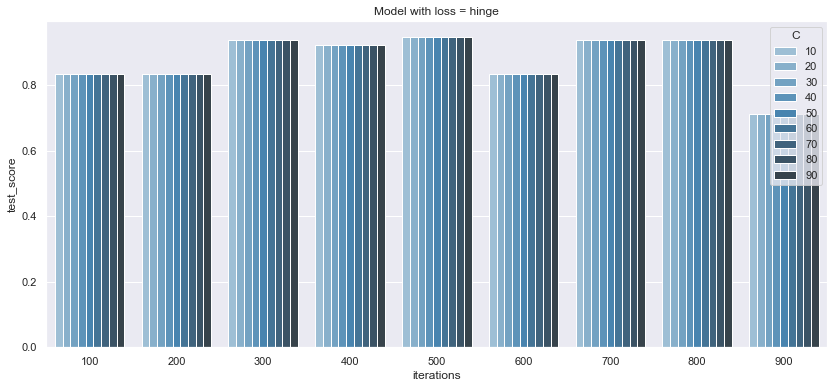

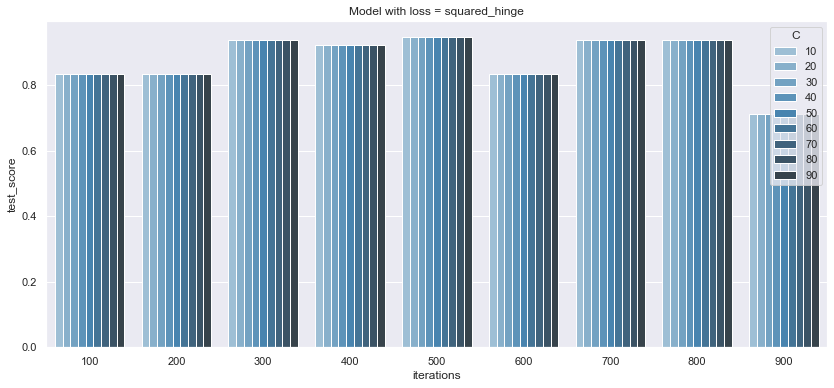

In [154]:
# Plot of test score
for loss_ in loss:
    to_plot = scores_svc_df[scores_svc_df["loss"] == loss_]

    plt.figure(figsize = (14, 6))
    sns.barplot(data = to_plot, x = "iterations", y = "test_score", hue = "C", ci = None, palette = "Blues_d")
    plt.title(f"Model with loss = {loss_}")
    plt.show()

In [155]:
scores_svc_df[scores_svc_df["test_score"] == scores_svc_df["test_score"].max()]

,C,iterations,scores,train_score,test_score,loss
4,10,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,hinge
13,20,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,hinge
22,30,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,hinge
31,40,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,hinge
40,50,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,hinge
49,60,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,hinge
58,70,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,hinge
67,80,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,hinge
76,90,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,hinge
4,10,500,"{'train_score': 0.9296703296703297, 'test_scor...",0.92967,0.947368,squared_hinge


Vemos que el modelo SVC obtiene los mejores resultados con 500 iteraciones, independientemente del resto de parámetros.